In [4]:
import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [5]:
dtype = torch.float
device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1861.346435546875
199 1247.861083984375
299 838.0838623046875
399 564.210205078125
499 381.0528869628906
599 258.4836730957031
699 176.4040985107422
799 121.39952087402344
899 84.51146697998047
999 59.75428009033203
1099 43.124900817871094
1199 31.945877075195312
1299 24.424358367919922
1399 19.35915184020996
1499 15.94495964050293
1599 13.641437530517578
1699 12.085783958435059
1799 11.034140586853027
1899 10.322490692138672
1999 9.840392112731934
Result: y = -0.02181103453040123 + 0.832956850528717 x + 0.003762767417356372 x^2 + -0.08994733542203903 x^3


In [16]:
import os
# don’t actually understand how/why this works with the OMP_NUM_THREADS=1
os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["CUDA_VISIBLE_DEVICES"]=""
# https://forums.fast.ai/t/fastai-on-apple-m1/86059/39

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
from fastai.vision.all import *

In [10]:
path = untar_data(URLs.PETS)

In [11]:
path.ls()

(#2) [Path('/Users/mton/.fastai/data/oxford-iiit-pet/images'),Path('/Users/mton/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
!ls -a

.                                 README.md
..                                copilotTest.js
.DS_Store                         fast-ai-dog-or-cat-tutorial.ipynb
.git                              helloworld.ipynb
.gitignore                        helloworld.py
.ipynb_checkpoints                pytorchnotes.txt
.venv                             tutorial_play_the_game.ipynb
.vscode


In [12]:
files = get_image_files(path/"images")
len(files)

7390

In [7]:
# type: ignore
# ?? returns source for any function
??get_image_files
# ? returns commment for any function
?get_image_files
# doc(func) gets document links
doc(get_image_files)

Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      ~/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/fastai/data/transforms.py
Type:      function


In [8]:
files[0], files[6]

(Path('/Users/mton/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 Path('/Users/mton/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'))

In [13]:
def label_func(f):
    return f[0].isupper()

In [10]:
files[0].name
#label_func(files)

'Egyptian_Mau_167.jpg'

In [14]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

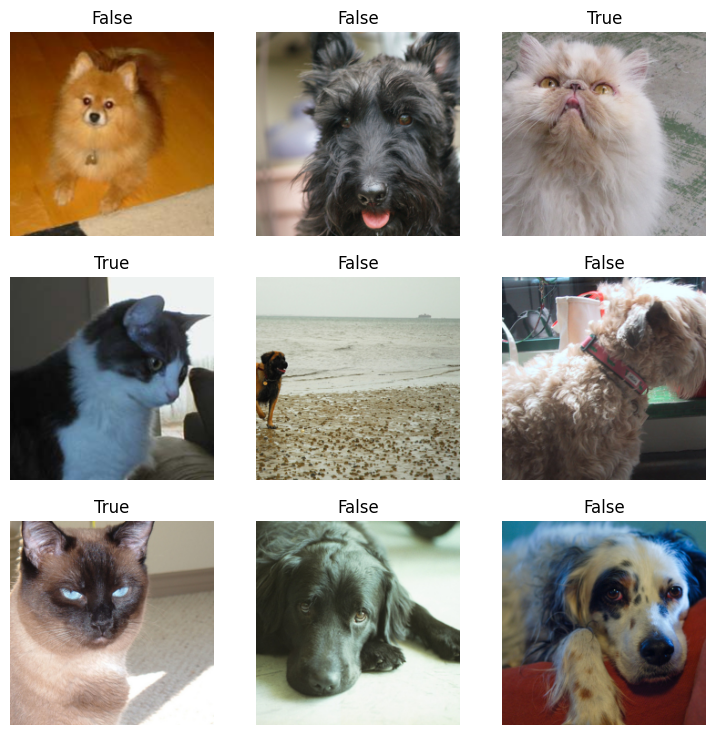

In [12]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
